In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels
import pyqtgraph
import pickle
import graphviz
# pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
plt.style.use('fivethirtyeight')

%matplotlib inline
from tqdm import tqdm
# modelling imports
from sklearn import svm, datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [24]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
df = pickle.load( open("save.p", "rb"))
# df = pd.read_csv('usa_00004.csv')
df['>50K'] = df['INCTOT'].apply(lambda x: 1 if x > 50000 else 0)
df

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,RELATE,RELATED,SEX,AGE,BIRTHQTR,MARST,BIRTHYR,MARRNO,MARRINYR,YRMARR,DIVINYR,WIDINYR,RACE,RACED,HISPAN,HISPAND,BPL,BPLD,ANCESTR1,ANCESTR1D,ANCESTR2,ANCESTR2D,CITIZEN,YRNATUR,YRIMMIG,YRSUSA1,YRSUSA2,LANGUAGE,LANGUAGED,SPEAKENG,SCHOOL,EDUC,EDUCD,GRADEATT,GRADEATTD,SCHLTYPE,DEGFIELD,DEGFIELDD,DEGFIELD2,DEGFIELD2D,INCTOT,FTOTINC,INCWAGE,INCSS,INCWELFR,INCINVST,INCRETIR,INCSUPP,INCOTHER,INCEARN,POVERTY,VETDISAB,DIFFREM,DIFFPHYS,DIFFMOB,DIFFCARE,DIFFSENS,DIFFEYE,DIFFHEAR,>50K
2292,2018.0,201801.0,2293.0,2.018000e+12,192.0,2.018000e+12,210001.0,1.0,1.0,192.0,1.0,101.0,1.0,70.0,3.0,1.0,1948.0,1.0,1.0,1965.0,1.0,1.0,1.0,100.0,0.0,0.0,1.0,100.0,940.0,9400.0,999.0,9990.0,0.0,9999.0,0.0,0.0,0.0,1.0,100.0,3.0,1.0,6.0,63.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,60900.0,96400.0,24000.0,20400.0,0.0,0.0,16500.0,0.0,0.0,24000.0,501.0,0.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,1
2293,2018.0,201801.0,2293.0,2.018000e+12,192.0,2.018000e+12,210001.0,1.0,2.0,170.0,2.0,201.0,2.0,71.0,4.0,1.0,1947.0,1.0,1.0,1965.0,1.0,1.0,1.0,100.0,0.0,0.0,1.0,100.0,940.0,9400.0,999.0,9990.0,0.0,9999.0,0.0,0.0,0.0,1.0,100.0,3.0,1.0,6.0,63.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,35500.0,96400.0,26000.0,9500.0,0.0,0.0,0.0,0.0,0.0,26000.0,501.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
2294,2018.0,201801.0,2294.0,2.018000e+12,36.0,2.018000e+12,180001.0,1.0,1.0,37.0,1.0,101.0,1.0,60.0,1.0,1.0,1958.0,3.0,1.0,2006.0,1.0,1.0,1.0,100.0,0.0,0.0,1.0,100.0,87.0,870.0,999.0,9990.0,0.0,9999.0,0.0,0.0,0.0,1.0,100.0,3.0,1.0,6.0,63.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,29100.0,59100.0,29100.0,0.0,0.0,0.0,0.0,0.0,0.0,29100.0,227.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
2295,2018.0,201801.0,2294.0,2.018000e+12,36.0,2.018000e+12,180001.0,1.0,2.0,43.0,2.0,201.0,2.0,50.0,2.0,1.0,1968.0,2.0,1.0,2006.0,1.0,1.0,1.0,100.0,0.0,0.0,1.0,100.0,22.0,220.0,87.0,870.0,0.0,9999.0,0.0,0.0,0.0,1.0,100.0,3.0,1.0,8.0,81.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,20800.0,59100.0,20800.0,0.0,0.0,0.0,0.0,0.0,0.0,20800.0,227.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
2297,2018.0,201801.0,2294.0,2.018000e+12,36.0,2.018000e+12,180001.0,1.0,4.0,48.0,8.0,801.0,2.0,60.0,4.0,6.0,1958.0,0.0,0.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,1.0,100.0,999.0,9990.0,999.0,9990.0,0.0,9999.0,0.0,0.0,0.0,1.0,100.0,3.0,1.0,6.0,64.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9200.0,59100.0,0.0,0.0,0.0,0.0,5600.0,3600.0,0.0,0.0,227.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3214531,2018.0,201801.0,1410974.0,2.018001e+12,102.0,2.018014e+12,40056.0,1.0,1.0,102.0,1.0,101.0,1.0,41.0,1.0,4.0,1977.0,1.0,1.0,2004.0,1.0,1.0,1.0,100.0,0.0,0.0,56.0,5600.0,999.0,9990.0,999.0,9990.0,0.0,9999.0,0.0,0.0,0.0,1.0,100.0,3.0,1.0,6.0,65.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,42100.0,42100.0,42100.0,0.0,0.0,0.0,0.0,0.0,0.0,42100.0,329.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
3214532,2018.0,201801.0,1410974.0,2.018001e+12,102.0,2.018014e+12,40056.0,1.0,2.0,93.0,11.0,1114.0,2.0,34.0,1.0,6.0,1984.0,0.0,0.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,56.0,5600.0,999.0,9990.0,999.0,9990.0,0.0,9999.0,0.0,0.0,0.0,1.0,100.0,3.0,1.0,10.0,101.0,0.0,0.0,1.0,36.0,3699.0,0.0,0.0,47500.0,42100.0,47500.0,0.0,0.0,0.0,0.0,0.0,0.0,47500.0,371.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
3214536,2018.0,201801.0,1410975.0,2.018001e+12,50.0,2.018014e+12,10056.0,1.0,1.0,49.0,1.0,101.0,2.0,49.0,1.0,4.0,1969.0,1.0,1.0,1993.0,1.0,1.0,1.0,100.0,0.0,0.0,56.0,5600.0,999.0,9990.0,999.0,9990.0,0.0,9999.0,0.0,0.0,0.0,1.0,100.0,3.0,1.0,7.0,71.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,18500.0,30000.0,18500.0,0.0,0.0,0.0,0.0,0.0,0.0,18500.0,181.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
3214537,2018.0,201801.0,1410975.0,2.018001e+12,50.0,2.018014e+12,10056.0,1.0,2.0,46.0,3.0,301.0,2.0,19.0,1.0,6.0,1999.0,0.0,0.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,53.0,5300.0,999.0,9990.0,999.0,9990.0,0.0,9999.0,0.0,0.0,0

In [3]:
# dropped = df.replace({9999999: np.NaN, 9999998: np.NaN, 99999:np.NaN, 999999:np.NaN})
# dropped = dropped.dropna(inplace=True)

In [4]:
# df.isna().sum()
# df.dropna(inplace=True)
# pickle.dump(df, open("save.p", "wb"))

# df.isna().sum()
# df.info().round(2)
# dropped
training_wheels = df.sample(1000)

In [5]:
above = df['INCTOT'].loc[df['INCTOT'] >50000].count()
below = df['INCTOT'].loc[df['INCTOT'] < 50000].count()
total = df['INCTOT'].count()

above_percent = above / total
below_percent = below / total
print(f'The percentage making above 50k: {above_percent}')
print(f'The percentage making below 50k: {below_percent}')

The percentage making above 50k: 0.2827248388075369
The percentage making below 50k: 0.6995624489376626


In [6]:
# X = df.drop(columns=['>50K', 'INCTOT', 'FTOTINC', 'INCWAGE', 'INCEARN']) do I need to drop 
# X = df.drop(columns=['>50K', 'INCTOT', 'FTOTINC', 'INCWAGE', 'INCSS', 'INCWELFR', 'INCINVST', 'INCRETIR', 'INCSUPP', 'INCOTHER', 'INCEARN', 'POVERTY', 'SAMPLE', 'SERIAL', 'CBSERIAL', 'HHWT', 'CLUSTER', 'STRATA', 'GQ', 'PERNUM', 'PERWT'])
# X = df.filter(['EDUC'])
# y = df.filter(['>50K'])

In [7]:
X = training_wheels.drop(columns=['>50K', 'INCTOT', 'FTOTINC', 'INCWAGE', 'INCSS', 'INCWELFR', 'INCINVST', 'INCRETIR', 'INCSUPP', 'INCOTHER', 'INCEARN', 'POVERTY', 'SAMPLE', 'SERIAL', 'CBSERIAL', 'HHWT', 'CLUSTER', 'STRATA', 'GQ', 'PERNUM', 'PERWT'])
# X = df.filter(['EDUC'])
y = training_wheels.filter(['>50K'])

In [8]:
features = list(X.columns)
features

['YEAR',
 'RELATE',
 'RELATED',
 'SEX',
 'AGE',
 'BIRTHQTR',
 'MARST',
 'BIRTHYR',
 'MARRNO',
 'MARRINYR',
 'YRMARR',
 'DIVINYR',
 'WIDINYR',
 'RACE',
 'RACED',
 'HISPAN',
 'HISPAND',
 'BPL',
 'BPLD',
 'ANCESTR1',
 'ANCESTR1D',
 'ANCESTR2',
 'ANCESTR2D',
 'CITIZEN',
 'YRNATUR',
 'YRIMMIG',
 'YRSUSA1',
 'YRSUSA2',
 'LANGUAGE',
 'LANGUAGED',
 'SPEAKENG',
 'SCHOOL',
 'EDUC',
 'EDUCD',
 'GRADEATT',
 'GRADEATTD',
 'SCHLTYPE',
 'DEGFIELD',
 'DEGFIELDD',
 'DEGFIELD2',
 'DEGFIELD2D',
 'VETDISAB',
 'DIFFREM',
 'DIFFPHYS',
 'DIFFMOB',
 'DIFFCARE',
 'DIFFSENS',
 'DIFFEYE',
 'DIFFHEAR']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
train_df = X_train.copy()
train_df['$$$'] = y_train

train_df

,YEAR,RELATE,RELATED,SEX,AGE,BIRTHQTR,MARST,BIRTHYR,MARRNO,MARRINYR,YRMARR,DIVINYR,WIDINYR,RACE,RACED,HISPAN,HISPAND,BPL,BPLD,ANCESTR1,ANCESTR1D,ANCESTR2,ANCESTR2D,CITIZEN,YRNATUR,YRIMMIG,YRSUSA1,YRSUSA2,LANGUAGE,LANGUAGED,SPEAKENG,SCHOOL,EDUC,EDUCD,GRADEATT,GRADEATTD,SCHLTYPE,DEGFIELD,DEGFIELDD,DEGFIELD2,DEGFIELD2D,VETDISAB,DIFFREM,DIFFPHYS,DIFFMOB,DIFFCARE,DIFFSENS,DIFFEYE,DIFFHEAR,$$$
2040467,2018.0,1.0,101.0,2.0,29.0,4.0,6.0,1989.0,0.0,0.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,34.0,3400.0,51.0,511.0,50.0,500.0,0.0,9999.0,0.0,0.0,0.0,1.0,100.0,3.0,2.0,10.0,101.0,7.0,70.0,3.0,62.0,6207.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
2680883,2018.0,1.0,101.0,1.0,55.0,4.0,1.0,1963.0,1.0,1.0,1998.0,1.0,1.0,1.0,100.0,0.0,0.0,34.0,3400.0,142.0,1420.0,129.0,1290.0,0.0,9999.0,0.0,0.0,0.0,1.0,100.0,3.0,1.0,8.0,81.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
1609755,2018.0,2.0,201.0,1.0,57.0,1.0,1.0,1961.0,1.0,1.0,1983.0,1.0,1.0,1.0,100.0,0.0,0.0,27.0,2700.0,996.0,9960.0,999.0,9990.0,0.0,9999.0,0.0,0.0,0.0,1.0,100.0,3.0,1.0,6.0,63.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
353474,2018.0,1.0,101.0,1.0,81.0,3.0,1.0,1937.0,2.0,1.0,1988.0,1.0,1.0,1.0,100.0,4.0,416.0,210.0,21030.0,226.0,2260.0,999.0,9990.0,2.0,1992.0,1980.0,38.0,5.0,12.0,1200.0,4.0,1.0,7.0,71.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
1305375,2018.0,1.0,101.0,2.0,42.0,2.0,2.0,1976.0,1.0,1.0,2007.0,1.0,1.0,2.0,200.0,0.0,0.0,36.0,3600.0,902.0,9020.0,999.0,9990.0,0.0,9999.0,0.0,0.0,0.0,1.0,100.0,3.0,1.0,10.0,101.0,0.0,0.0,1.0,19.0,1902.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2528228,2018.0,1.0,101.0,1.0,62.0,1.0,6.0,1956.0,0.0,0.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,44.0,4400.0,50.0,502.0,999.0,9990.0,0.0,9999.0,0.0,0.0,0.0,1.0,100.0,3.0,1.0,6.0,64.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0
2855327,2018.0,1.0,101.0,2.0,19.0,1.0,6.0,1999.0,0.0,0.0,0.0,0.0,0.0,1.0,100.0,1.0,100.0,48.0,4800.0,210.0,2101.0,999.0,9990.0,0.0,9999.0,0.0,0.0,0.0,12.0,1200.0,4.0,1.0,6.0,63.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
2900747,2018.0,1.0,101.0,1.0,57.0,4.0,1.0,1961.0,2.0,1.0,1992.0,1.0,1.0,1.0,100.0,0.0,0.0,48.0,4800.0,21.0,210.0,999.0,9990.0,0.0,9999.0,0.0,0.0,0.0,1.0,100.0,3.0,1.0,6.0,64.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
1570526,2018.0,1.0,101.0,2.0,43.0,2.0,6.0,1975.0,0.0,0.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,27.0,2700.0,32.0,321.0,82.0,820.0,0.0,9999.0,0.0,0.0,0.0,1.0,100.0,3.0,1.0,10.0,101.0,0.0,0.0,1.0,62.0,6200.0,0.0,0.0,0.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,0


In [11]:
std_scale = StandardScaler()
X_train_scaled = std_scale.fit_transform(X_train)

In [12]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)


/home/nick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier()

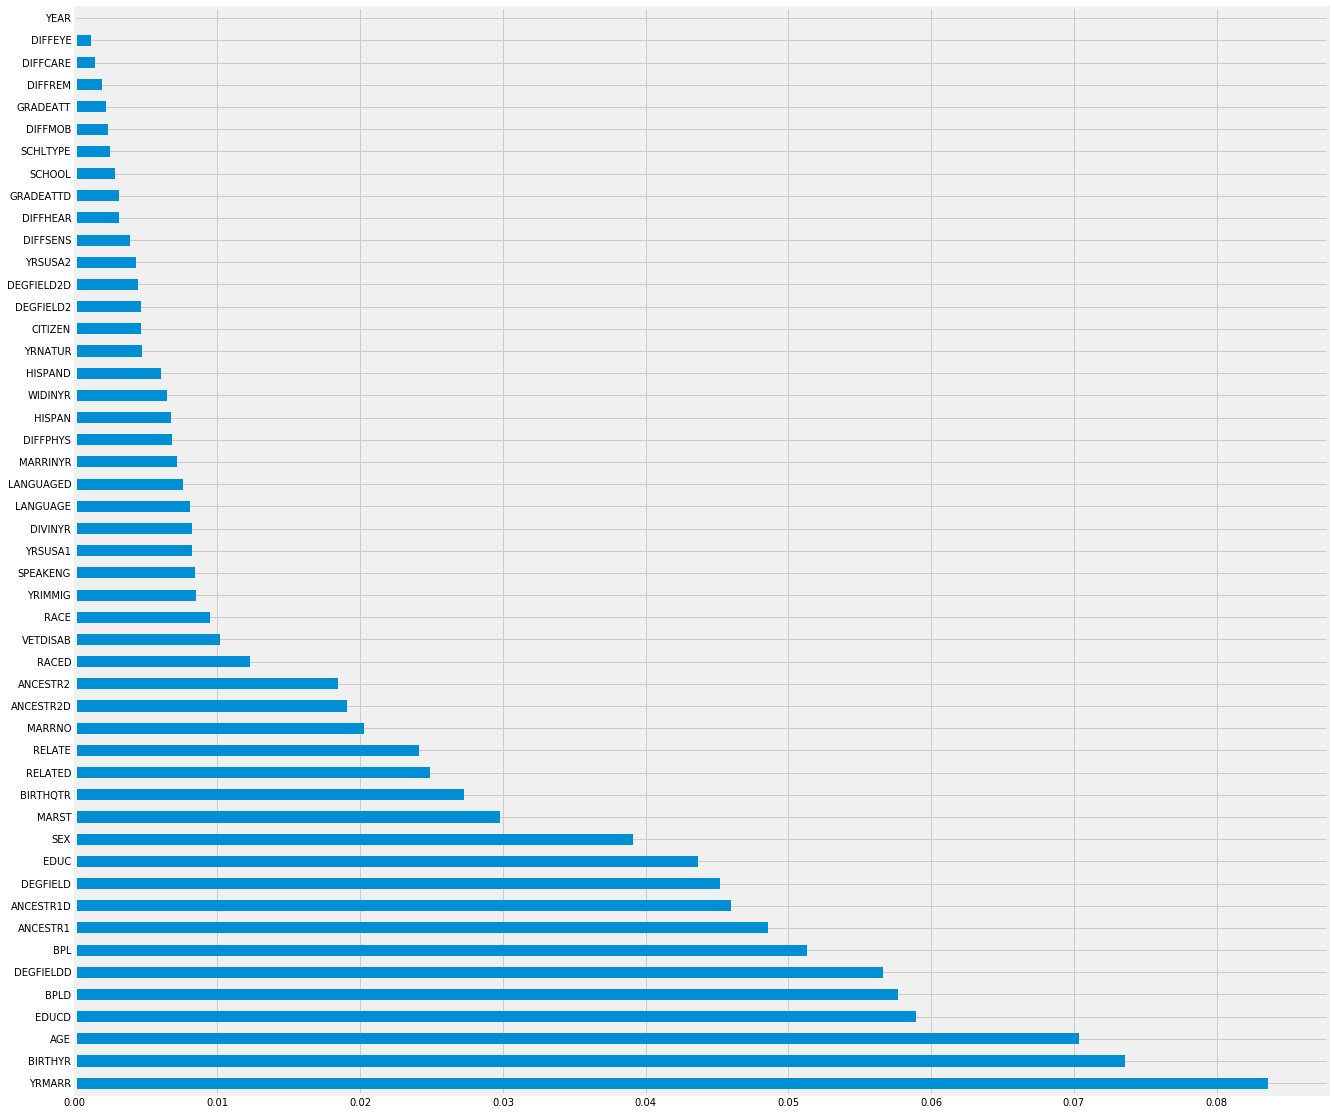

In [13]:
plt.figure(figsize=[20, 20])
importance = pd.Series(rf.feature_importances_, index=features)
importance.nlargest(len(features)).plot(kind='barh')

In [14]:
dt = DecisionTreeClassifier(min_samples_split=2, random_state=69)
dt.fit(X, y)

DecisionTreeClassifier(random_state=69)

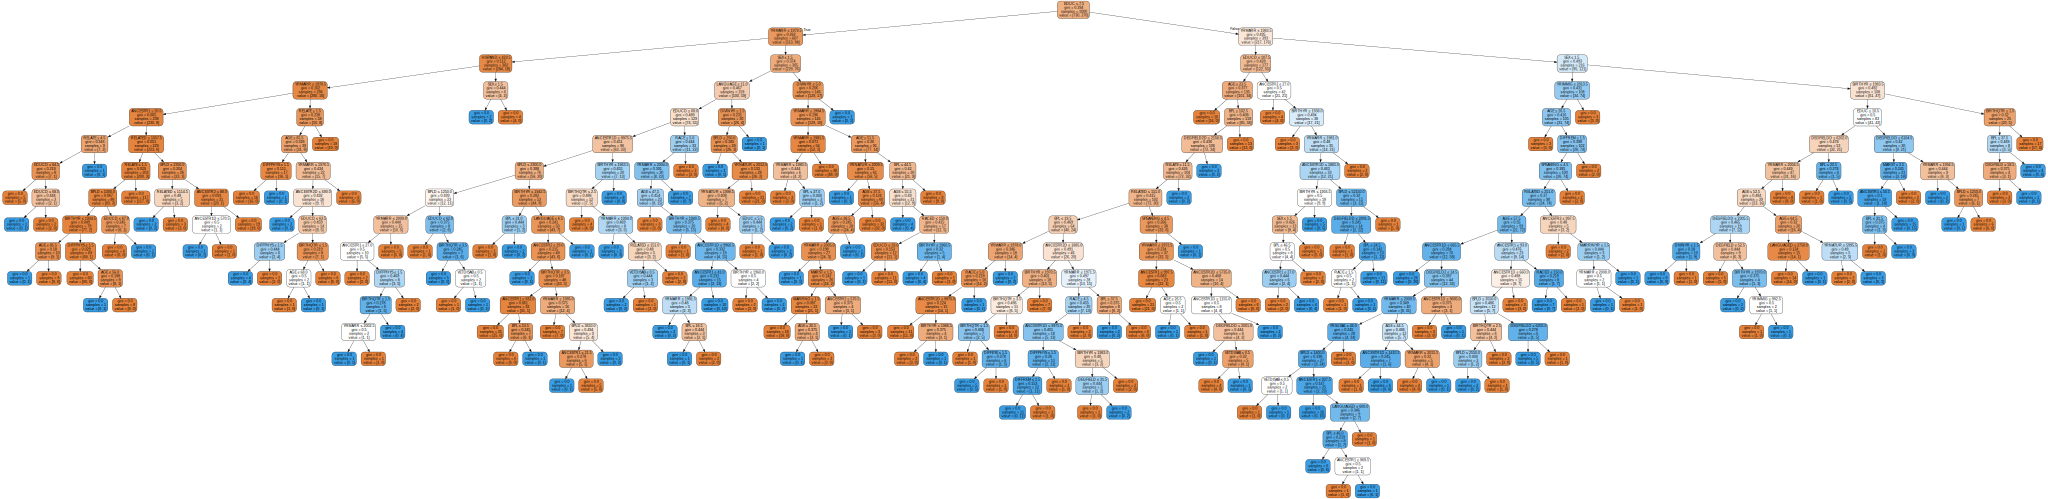

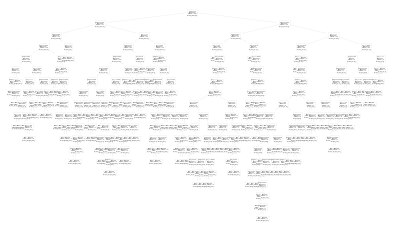

In [28]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
tree.plot_tree(clf)

dot_data = tree.export_graphviz(clf, feature_names=features,
                   filled=True, rounded=True,  
                   special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [16]:
# decision_tree = DecisionTreeClassifier()
# decision_tree = decision_tree.fit(X, y)
# r = export_text(decision_tree, feature_names=features)
# r

In [ ]:
classifier = svm.LinearSVC()
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

In [ ]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))